# GOTM Overview plot
Makes a basic plot showing the evolution of the 1D simulation

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
from pylab import *
import scipy.integrate as integrate
#from cmocean import cm as cmo
import matplotlib.gridspec as gridspec
import matplotlib.ticker 
import scipy.stats as stats
import scipy.optimize as optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import savgol_filter
from netCDF4 import Dataset

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [48]:
# Load GOTM

filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/GOTMOUTPUTS/gotm_1e-5_0p02.nc' # Ruan et al. 2019 case F
N2 = 1e-5
tht = 0.02

ds =  Dataset(filename, 'r')  # Dataset is the class behavior to open the file

u = np.squeeze(ds.variables['u'])
v = np.squeeze(ds.variables['v'])
b = np.squeeze(ds.variables['buoy'])
# drag = np.squeeze(ds.variables['drag'][:,0])
av = np.squeeze(ds.variables['num'])
taub = np.squeeze(ds.variables['taub'])


time = ds.variables['time'][:]

z1 = ds.variables['z1'][:][0,:,0,0]
z = ds.variables['z'][:][0,:,0,0]

ty = (av[:,1][:,np.newaxis])*(np.gradient(v, axis=-1))/np.gradient(z)
tx = (av[:,1][:,np.newaxis])*(np.gradient(u, axis=-1))/np.gradient(z)

In [6]:
time.shape

(2881,)

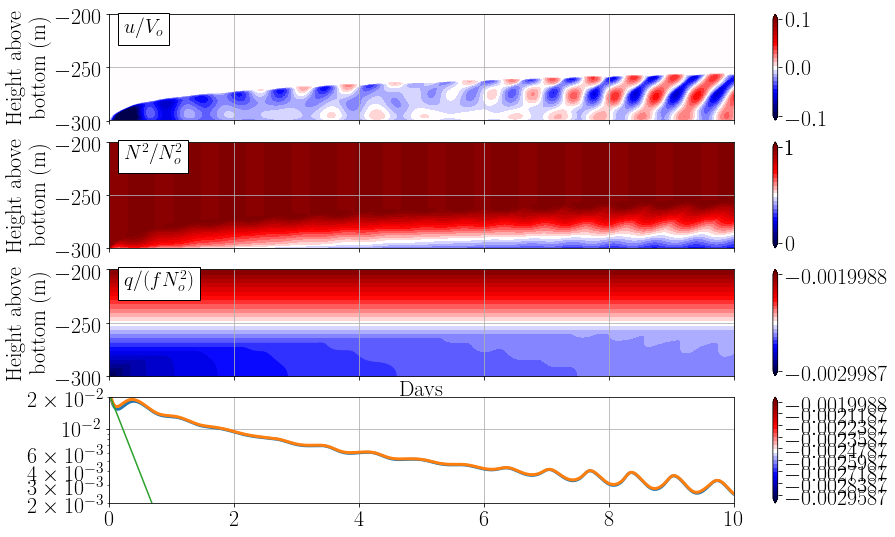

In [49]:

cminv = 0.03
loff = 20
fig, ax=plt.subplots(4,1, sharex=True, figsize=(14,9))
# yl = (z[0],z[0]+125)
yl = (z[0], z[0]+100)
#ax[0].plot(time/86400, bflux)
#ax[0].grid()
#plt.colorbar(ax=ax[0])
cminv = -0.1
cmaxv = 0.1
ix = ax[0].contourf(time/86400, z, np.transpose(u[:,:])/0.1,np.linspace(cminv, cmaxv, 26), vmin=cminv, vmax=cmaxv, cmap='seismic', extend='both')
plt.colorbar( ix, ax=ax[0] , ticks=[cminv,0, cmaxv] )
#cb = plt.colorbar( ix, ax=ax[0])

#ax[0].plot(time/86400, bflux)
# ax[0].set_ylabel('$m^2s^{-3}$')
ax[0].set_ylabel('Height above\n bottom (m)')
bb = dict(boxstyle='Square', fc='w')
ax[0].text(0.25,yl[-1]-loff, '$u/V_o$', fontsize=20, bbox=bb)
ax[0].grid()
ax[0].set_ylim(yl)
ax[0].set_xlim((0, 10))

cmin=0
cmax = 1

ix = ax[1].contourf(time/86400, z, np.transpose(v[:,:])/0.1,np.linspace(cmin, cmax, 26), vmin=cmin, vmax=cmax, cmap='seismic', extend='both')
plt.colorbar( ix, ax=ax[1] , ticks=[cmin,1, cmax] )
#cb = plt.colorbar( ix, ax=ax[0])
# ax[1].plot(time/86400, zm[0] + H)

#ax[0].set_xlabel('Days')
ax[1].set_ylabel('Height above\n bottom (m)')#ax[1].set_title('$N^2/N^2_o$')
ax[1].set_ylim(yl)
ax[1].grid()
ax[1].text(0.24, yl[-1]-loff, '$N^2/N^2_o$', fontsize=20, bbox=bb)
#ax[0].plot(time/86400, -Hd)
for c in ix.collections:
    c.set_edgecolor("face")
    
cmin = b[0,0]
cmax = b[0,400]
ix = ax[2].contourf(time/86400, z, np.transpose(b), np.linspace(cmin, cmax, 26), vmin=cmin, vmax=cmax, cmap='seismic', extend='both')
plt.colorbar( ix, ax=ax[2] , ticks=[cmin, 0, cmax] )
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Height above\n bottom (m)')
#ax[2].set_title('q')
ax[2].set_ylim(yl)
ax[2].text(0.25, yl[-1]-loff, '$q/(fN^2_o)$', fontsize=20, bbox=bb)

# ax[2].plot(time/86400, H, linewidth=2)
# ax[2].plot(time/86400, h, linewidth=2, linestyle='dashed')

#ax[1].plot(time/86400, -H)
#ax[1].plot(time/86400, -hi)
ax[2].grid()
for c in ix.collections:
    c.set_edgecolor("face")

ax[3].semilogy(time[1:]/86400, 1030*ty[1:,0], linewidth=3)
ax[3].semilogy(time[1:]/86400, taub[1:], linewidth=3)
# ax[3].plot(time[1:]/86400, 1030*np.sqrt(ty[1:,0]**2 + tx[1:,0]**2), linewidth=3)
TE = 1e-4/(N2*tht**2)
ax[3].semilogy(time[1:]/86400, 1030*ty[1,0]*np.exp(-time[1:]/TE))
ax[3].set_ylim(2e-3, 2e-2)
plt.grid()
plt.colorbar(ix, ax=ax[3])
# plt.savefig('Overview3_1e-5_0p05.eps', bbox_inches='tight')

In [ ]:


#%% OVERVIEW PLOT WITH RI
plt.rcParams.update({'font.size': 18})
plt.rcParams['contour.negative_linestyle'] = 'solid'
cm = 'seismic'
#cm = 'binary'
z = a['z'] 
um = 0.025
nc = 24#30
lw = 0.5
#nc = 20
uc = np.linspace(-um, um,nc)
vm = 0.11
vc = np.linspace(-vm, vm, nc)
bm = 0.0065 
#bm = 0.0075
bma = 0.0045 

bma = 0.0005*1e3
#bma = -0.005*1e3
bm = 0.003*1e3 # FOR UPWELLING
bm = 0.002*1e3 # FOR DOWNWELLING
bc = np.linspace(-bm, -bma, nc)
kc = np.linspace(-5, -2, 10)
rc = np.linspace(0, 2, 20)
#rc = np.linspace(0, 8, 10)
fig, ax = plt.subplots( 5, 1, sharex=True, figsize=(10, 10))

# U PLOT
UM = ax[0].contourf(time*a['f']/(2*np.pi), z, np.transpose(Us),uc, vmin=-um, vmax=um, cmap=cm, extend='both' )
cb = fig.colorbar(UM, ax=ax[0])
cb.set_ticks(np.linspace(uc[0], uc[-1], 3))
cb.set_label('$m s^{-1}$')
ax[0].contour(time*a['f']/(2*np.pi), z, np.transpose(Us),levels=uc, colors='0.5', linewidths=lw)

# V PLOT
VM = ax[1].contourf(time*a['f']/(2*np.pi), z, np.transpose(Vs),vc, vmin=-vm, vmax=vm, cmap=cm, extend='both' )
VM.set_clim(-0.1, 0.1)
cb = fig.colorbar(VM, ax=ax[1])
cb.set_ticks(np.linspace(-.1,.1, 3))
cb.set_label('$m s^{-1}$', labelpad=25)
ax[1].contour(time*a['f']/(2*np.pi), z, np.transpose(Vs),levels=vc, colors='0.5', linewidths=lw)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

# B PLOT
BM = ax[2].contourf(time*a['f']/(2*np.pi), z, np.transpose(Bs*1e3), bc, vmin=-bm, bmax=-bma, cmap=cm )
cb = fig.colorbar(BM, ax=ax[2])
cb.set_ticks(np.linspace(bc[0], bc[-1], 3))
cb.set_label('$\\times 10^{-3}$  $m s^{-2}$', labelpad=16)

ax[2].contour(time*a['f']/(2*np.pi), z, np.transpose(Bs*1e3),levels=bc, colors='0.5', linewidths=lw)

# KAPPA PLOT
KM = ax[3].contourf(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Kappas)), kc, vmin=kc[0], vmax=kc[-1], cmap=cm)
cb = fig.colorbar(KM, ax=ax[3])
cb.set_ticks(np.linspace(kc[0], kc[-1], 3))
cb.set_label('$log_{10}(m^2 s^{-1})$', labelpad=28)
ax[3].contour(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Kappas)),levels=kc, colors='0.5', linewidths=lw)

# Ri Plot
NM = ax[4].contourf(time*a['f']/(2*np.pi), z[0:-1], (np.transpose(Ri**(1))), rc, vmin=rc[0], vmax=rc[-1], extend='both', cmap=cm)
cb = fig.colorbar(NM, ax=ax[4])
cti  = np.linspace(rc[0], rc[-1], 3)
cb.set_ticks(cti)
cb.set_ticklabels(['$<$'+str(cti[0]), str(cti[1]), '$>$'+str(cti[2])])
#cb.set_label('$log_{10}(m^2 s^{-1})$')
ax[4].contour(time*a['f']/(2*np.pi), z[0:-1], (np.transpose(Ri**(1))),levels=rc, colors='0.5', linewidths=lw)

maxh = 100
ax[0].set_ylim((0, maxh))
ax[1].set_ylim((0, maxh))
ax[2].set_ylim((0, maxh))
ax[3].set_ylim((0, maxh))
ax[4].set_ylim((0, maxh))
maxt = 30
ax[0].set_xlim((0, maxt))
ax[1].set_xlim((0, maxt))
ax[2].set_xlim((0, maxt))
ax[3].set_xlim((0, maxt))
ax[4].set_xlim((0, maxt))
ax[0].set_ylabel('$z (m)$', fontsize=26)
ax[1].set_ylabel('$z (m)$', fontsize=26)
ax[2].set_ylabel('$z (m)$', fontsize=26)
ax[3].set_ylabel('$z (m)$', fontsize=26)
ax[4].set_ylabel('$z (m)$', fontsize=26)
ax[4].set_xlabel('$\\frac{tf}{2 \\pi}$', fontsize=28)

bb = dict(boxstyle='Square', fc='w')

xp = 0.75
ax[0].text(xp, 75, '$U$', fontsize=20, bbox=bb)
ax[1].text(xp, 75, '$V$', fontsize=20, bbox=bb)
ax[2].text(xp, 75, '$B$', fontsize=20, bbox=bb)
ax[3].text(xp, 75, '$\\kappa$', fontsize=20, bbox=bb)
ax[4].text(xp, 75, 'Ri', fontsize=20, bbox=bb)

#plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/EkmanSpinDOWN.eps', format='eps', dpi=1000)
#plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/EkmanSpinUP.eps', format='eps', dpi=1000)


##%%
#plt.rcParams.update({'font.size': 18})
#plt.rcParams['contour.negative_linestyle'] = 'solid'
#cm = 'seismic'
#z = a['z'] 
#um = 0.025
#nc = 24#30
#uc = np.linspace(-um, um,nc)
#vm = 0.11
#vc = np.linspace(-vm, vm, nc)
#bm = 0.0065 
##bm = 0.0075
#bma = 0.0045 
#bc = np.linspace(-bm, -bma, nc)
#kc = np.linspace(-5, -2, 10)
#fig, ax = plt.subplots( 5, 1, sharex=True, figsize=(10, 10))
#UM = ax[0].contourf(time*a['f']/(2*np.pi), z, np.transpose(Us),uc, vmin=-um, vmax=um, cmap=cm )
#cb = fig.colorbar(UM, ax=ax[0])
#cb.set_ticks(np.linspace(uc[0], uc[-1], 3))
#cb.set_label('$m s^{-1}$')
#
#ax[0].contour(time*a['f']/(2*np.pi), z, np.transpose(Us),levels=uc, colors='0.5')
#VM = ax[1].contourf(time*a['f']/(2*np.pi), z, np.transpose(Vs),vc, vmin=-vm, vmax=vm, cmap=cm, extend='both' )
#VM.set_clim(-0.1, 0.1)
#cb = fig.colorbar(VM, ax=ax[1])
#cb.set_ticks(np.linspace(-.1,.1, 3))
#cb.set_label('$m s^{-1}$')
#
#ax[1].contour(time*a['f']/(2*np.pi), z, np.transpose(Vs),levels=vc, colors='0.5')
#
#BM = ax[2].contourf(time*a['f']/(2*np.pi), z, np.transpose(Bs), bc, vmin=-bm, bmax=-bma, cmap=cm )
#cb = fig.colorbar(BM, ax=ax[2])
#cb.set_ticks(np.linspace(bc[0], bc[-1], 3))
#cb.set_label('$m s^{-2}$')
#
#ax[2].contour(time*a['f']/(2*np.pi), z, np.transpose(Bs),levels=bc, colors='0.5')
#
#KM = ax[3].contourf(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Kappas)), kc, vmin=kc[0], vmax=kc[-1], cmap=cm)
#cb = fig.colorbar(KM, ax=ax[3])
#cb.set_ticks(np.linspace(kc[0], kc[-1], 3))
#cb.set_label('$log_{10}(m^2 s^{-1})$')
#
#ax[3].contour(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Kappas)),levels=kc, colors='0.5')
#
#NM = ax[4].contourf(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Nus)), kc, vmin=kc[0], vmax=kc[-1], cmap=cm)
#cb = fig.colorbar(NM, ax=ax[4])
#cb.set_ticks(np.linspace(kc[0], kc[-1], 3))
#cb.set_label('$log_{10}(m^2 s^{-1})$')
#ax[4].contour(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Nus)),levels=kc, colors='0.5')
#
#maxh = 100
#ax[0].set_ylim((0, maxh))
#ax[1].set_ylim((0, maxh))
#ax[2].set_ylim((0, maxh))
#ax[3].set_ylim((0, maxh))
#ax[4].set_ylim((0, maxh))
#maxt = 30
#ax[0].set_xlim((0, maxt))
#ax[1].set_xlim((0, maxt))
#ax[2].set_xlim((0, maxt))
#ax[3].set_xlim((0, maxt))
#ax[4].set_xlim((0, maxt))
#ax[0].set_ylabel('$z (m)$', fontsize=26)
#ax[1].set_ylabel('$z (m)$', fontsize=26)
#ax[2].set_ylabel('$z (m)$', fontsize=26)
#ax[3].set_ylabel('$z (m)$', fontsize=26)
#ax[4].set_ylabel('$z (m)$', fontsize=26)
#ax[4].set_xlabel('$\\frac{tf}{2 \\pi}$', fontsize=26)
#
#bb = dict(boxstyle='Square', fc='w')
#
#xp = 0.75
#ax[0].text(xp, 75, '$U$', fontsize=20, bbox=bb)
#ax[1].text(xp, 75, '$V$', fontsize=20, bbox=bb)
#ax[2].text(xp, 75, '$B$', fontsize=20, bbox=bb)
#ax[3].text(xp, 75, '$\\kappa$', fontsize=20, bbox=bb)
#ax[4].text(xp, 75, '$\\nu$', fontsize=20, bbox=bb)

#plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/EkmanSpinDOWN.eps', format='eps', dpi=1000)
#plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/EkmanSpinUP.eps', format='eps', dpi=1000)



##%%
#plt.figure()
#plt.plot(Ri, z)
#plt.ylim((0,100))
#plt.xlim((-1, 1))

#%% Check Perturbation Structure
z = a['z']    

#plt.figure()
#plt.plot(a['b']*a['w'], z)
#
## Make Energetics Plot
plt.figure(figsize=(4.8, 4.8))
plt.plot(a['SP'], z)
plt.plot(a['BP'], z)
plt.plot(a['DISS'], z)
plt.xlabel('kinetic energy tendency [m$^2$/s$^3$]')
plt.ylabel('slope-normal coordinate [m]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.legend(['shear production', 'buoyancy production', 'Dissipation'], frameon=False)
plt.tight_layout()
plt.ylim((0, 100))
#
## Make Structure Plot
#ly = np.linspace(0, 2*np.pi, a['nz'])
#
nz = z.shape[0]
ly = np.linspace(0, 2*np.pi, nz)
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6.4, 6.4))
im = ax[0,0].pcolormesh(ly, z, np.real(a['u'].reshape(a['nz'], 1)
        * np.exp(1j*ly.reshape(1,a['nz']))), rasterized=True, cmap='RdBu_r')
plt.colorbar(im, ax=ax[0,0])
ax[0,0].set_title('across-slope velocity')
im = ax[0,1].pcolormesh(ly, z, np.real(a['v'].reshape(a['nz'], 1)
        * np.exp(1j*ly.reshape(1,a['nz']))), rasterized=True, cmap='RdBu_r')
plt.colorbar(im, ax=ax[0,1])
ax[0,1].set_title('along-slope velocity')
im = ax[1,0].pcolormesh(ly, z, np.real(a['w'].reshape(a['nz'], 1)
        * np.exp(1j*ly.reshape(1,a['nz']))), rasterized=True, cmap='RdBu_r')
plt.colorbar(im, ax=ax[1,0])
ax[1,0].set_title('slope-normal velocity')
im = ax[1,1].pcolormesh(ly, z, np.real(a['b'].reshape(a['nz'], 1)
        * np.exp(1j*ly.reshape(1,a['nz']))), rasterized=True, cmap='RdBu_r')
plt.colorbar(im, ax=ax[1,1])
ax[1,1].set_title('buoyancy')
ax[0,0].set_xticks([0, np.pi, 2*np.pi])
ax[1,0].set_xlabel('phase')
ax[1,1].set_xlabel('phase')
ax[0,0].set_ylabel('slope-normal coordinate [m]')
ax[1,0].set_ylabel('slope-normal coordinate [m]')
ax[0,0].set_ylim((0,100))
#%% STABILITY PLOT
#timet = time
#timet[timet==0] = np.nan
#grf[grf == 0] = np.nan

#grnd = np.zeros(grf.shape)
#grnd[1:-1, :] = grf[1:-1,:]-grf[ 0:-2, :]
#grnd[np.isnan(grnd)] =0
#grf[np.abs(grnd)>1e-7] = np.nan
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

array = grf
x = np.arange(0, array.shape[1])
y = np.arange(0, array.shape[0])
array = np.ma.masked_invalid(array)
ll, tt = np.meshgrid(x, y)
l1 = ll[~array.mask]
t1 = tt[~array.mask]
newg = array[~array.mask]
grfi = interpolate.griddata((l1, t1), newg.ravel(), (ll, tt), method='linear')
grfi[np.isnan(grfi)] = 0

#sigma = .95
#grfi = gaussian_filter(grfi, sigma)

cm = 0.25
cl = np.linspace(.0, cm, 41)
#grf[np.logical_not(np.isfinite(grf))] = 0
plt.figure(figsize=(10, 8))
a1=plt.contourf(a['ll']/(2*np.pi), time*a['f']/(2*np.pi), grfi/a['f'], cl, vmin=-cm, vmax=cm, cmap='RdGy_r')
for c in a1.collections:
    c.set_edgecolor("face")
cb = plt.colorbar()
cb.set_ticks(np.linspace(cl[0], cl[-1], 6))
cb.set_label('$\\omega_i$', fontsize = 26)
#cb.set_label('$\\omega_i/f$', fontsize = 26)
cb.solids.set_edgecolor("face")

plt.ylim((0, 30))
CS = plt.contour(a['ll']/(2*np.pi), time*a['f']/(2*np.pi), grfi/a['f'],
            [0.025, 0.1, 0.15, 0.2],colors='0.5')
plt.xlim((0, 0.00150))
#plt.tick_params(axis='both', which='major', labelsize=fs)
#mlocs = np.array([(.0008, 5), (0.0006, 8), (0.0007, 9),(0.0004, 20)]) # For downwwelling case
mlocs = [(0.001/(2*np.pi), 10)] # For Upwelling case
plt.clabel(CS, inline=1, fontsize = 10, fmt='%1.3f', manual = mlocs)
plt.xlabel('Along slope wavenumber, $l$ $[m^{-1}]$', fontsize = 24)
plt.ylabel('Time, ${tf}/{2\\pi}$', fontsize = 24)
plt.grid(linestyle='--', alpha = 0.5)

#plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/Revision 1/EkmanStabilityDOWN.pdf')
#plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/Revision 1/EkmanStabilityUP.pdf')

#plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/EkmanStabilityUP.eps', format='eps', dpi=1000)
#plt.savefig('/home/jacob/Dropbox/Presentations/OS 2018 Slope Presentation/Working Files/Figures/EkmanStabilityDOWN.pdf', dpi=1000)

##%%
#ind = next(x[0] for x in enumerate(time*a['f']/(2*np.pi)) if x[1] > 10) -1
#
#
#u = us[ind,:]
#v = vs[ind,:]
#b = bs[ind,:]
#w = ws[ind,:]
#SP = sps[ind,:]
#BP = bps[ind,:]
#DISS = diss[ind,:]
#cm = 'RdBu_r'
## most unstable mode
#fs = 18
#
#plt.rcParams['text.usetex'] = True
#plt.rcParams.update({'font.size': fs})
#plt.rcParams['contour.negative_linestyle'] = 'solid'
#
#nc  = 16
##nc = 
#lw =0.5
#ly = np.linspace(0, 2*np.pi, nz)
#uvel = np.real(u.reshape(nz, 1)* np.exp(1j*ly.reshape(1,nz)))
#vvel = np.real(v.reshape(nz, 1)* np.exp(1j*ly.reshape(1,nz)))
#wvel = np.real(w.reshape(nz, 1)* np.exp(1j*ly.reshape(1,nz)))
#maxu = np.max(uvel)
#
#uvel = uvel/maxu
#vvel = vvel/maxu
#wvel = wvel/maxu
#buoy = np.real(b.reshape(nz, 1)* np.exp(1j*ly.reshape(1,nz)))
#buoy = buoy/np.max(buoy)
#
#fig = plt.figure(figsize=(10, 9))
#gs = GridSpec(4, 5)
#gs.update(hspace=0.3, wspace=.45)
#ax3 = fig.add_subplot(gs[2:, :-3])
#
#ax1 = fig.add_subplot(gs[:-2, :-3])
#ax2 = fig.add_subplot(gs[:-2, 2:-1])
#ax4 = fig.add_subplot(gs[2:, 2:-1])
#
#gs2 = GridSpec(4,1)
#gs2.update(left=0.875, right=1.1)
#ax5 = fig.add_subplot(gs2[1:-1, 0])
#
##ax1 = plt.subplot2grid((4, 5), (0, 0), colspan=2, rowspan=2)
##ax2 = plt.subplot2grid((4, 5 ),(0, 2), colspan=2, rowspan=2)
##ax3 = plt.subplot2grid((4, 5), (2, 0), colspan=2, rowspan=2)
##ax4 = plt.subplot2grid((4, 5), (2, 2), colspan=2, rowspan=2)
##ax5 = plt.subplot2grid((4, 5), (1, 4), rowspan=2)
#
#
##fig = 
## UVEL
#im = ax1.contourf(ly, z, uvel, np.linspace(-1, 1, nc),vmin=-1, vmax=1, cmap=cm)
#cb = plt.colorbar(im, ax=ax1)
#cb.set_ticks([-1, 0, 1])
#ax1.contour(ly, z, uvel, np.linspace(-1, 1, nc), colors='0.8', linewidths=lw)
#ax1.set_title('Across-slope velocity', fontsize=fs)
#ax1.grid(linestyle='--', alpha = 0.5)
#
## VVEL
#vl = 0.8
#im = ax2.contourf(ly, z, vvel, np.linspace(-vl, vl, nc),vmin=-vl, vmax=vl, cmap=cm)
#cb = plt.colorbar(im, ax=ax2)
#cb.set_ticks([-vl, 0, vl])
#ax2.contour(ly, z, vvel, np.linspace(-vl, vl, nc), colors='0.8', linewidths=lw)
#
#ax2.set_title('Along-slope velocity', fontsize=fs)
#ax2.grid(linestyle='--', alpha = 0.5)
#
## WVEL
#wl = 0.04
#im = ax3.contourf(ly, z, wvel, np.linspace(-wl, wl, nc),vmin=-wl, vmax=wl, cmap=cm)
#cb = plt.colorbar(im, ax=ax3)
#cb.set_ticks([-wl, 0, wl])
#ax3.contour(ly, z, wvel, np.linspace(-wl, wl, nc), colors='0.8', linewidths=lw)
#
#ax3.set_title('Slope-normal velocity', fontsize=fs)
#ax3.grid(linestyle='--', alpha = 0.5)
#
## BUOY
#im = ax4.contourf(ly, z, buoy, np.linspace(-1, 1, nc),vmin=-1, vmax=1, cmap=cm)
#cb = plt.colorbar(im, ax=ax4)
#ax4.grid(linestyle='--', alpha = 0.5)
#ax4.contour(ly, z, buoy, np.linspace(-1, 1, nc), colors='0.8', linewidths=lw)
#
#np.linspace(-0.15, 0.15, nc)
#cb.set_ticks([-1, 0, 1])
#ax4.set_title('Buoyancy', fontsize=fs)
#ax1.set_xticks([0, np.pi, 2*np.pi])
#ax2.set_xticks([0, np.pi, 2*np.pi])
#ax3.set_xticks([0, np.pi, 2*np.pi])
#ax4.set_xticks([0, np.pi, 2*np.pi])
#
#ax3.set_xlabel('Along-slope phase', fontsize=fs)
#ax4.set_xlabel('Along-slope phase', fontsize=fs)
#ax1.set_ylabel('Slope-normal coordinate [m]', fontsize=fs)
#ax3.set_ylabel('Slope-normal coordinate [m]', fontsize=fs)
#
#
## Energetics
#ax5.plot(BP/np.max(BP), z)
#ax5.plot((SP)/np.max(BP), z)
#ax5.plot(DISS/np.max(BP), z)
##plt.plot(LSP/np.max(BP), z)
#
#ax5.set_xlabel('Kinetic energy tendency', fontsize=fs)
#ax5.set_ylabel('Slope-normal coordinate [m]', fontsize=fs)
#ax5.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
#leg = ax5.legend(['Buoyancy Production', 'Shear Production', 'Dissipation'], frameon=True, fontsize=12, loc=9)
#leg.get_frame().set_alpha(.9)
##plt.tight_layout()
#ax5.set_ylim((0, 150))
#ax5.set_xlim((-1.1, 1.1))
#ax5.grid(linestyle='--', alpha = 0.5)
##ax2.set_ylim((0, 50))
#
##ax3.set_xlim((0, 2*np.pi))
##labels = [item.get_text() for item in ax[1,1].get_xticklabels()]
#labels = ['0', '$\pi$', '$2\pi$']
#ax3.set_xticklabels(labels)  
#ax4.set_xticklabels(labels)
#emptylabels = ['']*len(ax3.get_xticklabels())
#ax1.set_xticklabels(emptylabels)
#ax2.set_xticklabels(emptylabels)
#emptylabels = ['']*len(ax1.get_yticklabels())
#ax2.set_yticklabels(emptylabels)
#ax4.set_yticklabels(emptylabels)
#plt.savefig('fig/modes.pdf', dpi=300)
##plt.tight_layout()
##plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/EkmanPerturbationsCombo.pdf', format='pdf', bbox_inches='tight')
##fig.subplots_adjust(wspace=10, vspace=0.1)
#plt.show()

##%% PRESENTATION PLOT WITH RI
#plt.rcParams.update({'font.size': 20})
#plt.rcParams['contour.negative_linestyle'] = 'solid'
#cm = 'seismic'
##cm = 'binary'
#z = a['z'] 
#um = 0.025
#nc = 24#30
#lw = 0.5
##nc = 20
#uc = np.linspace(-um, um,nc)
#vm = 0.11
#vc = np.linspace(-vm, vm, nc)
#bm = 0.0065 
##bm = 0.0075
#bma = 0.0045 
#
#bma = 0.0005*1e3
##bma = -0.005*1e3
#bm = 0.003*1e3 # FOR UPWELLING
#bm = 0.002*1e3 # FOR DOWNWELLING
#bc = np.linspace(-bm, -bma, nc)
#kc = np.linspace(-5, -2, 10)
#rc = np.linspace(0, 2, 20)
##rc = np.linspace(0, 8, 10)
#fig, ax = plt.subplots( 5, 1, sharex=True, figsize=(10, 10))
#
## U PLOT
#UM = ax[0].contourf(time*a['f']/(2*np.pi), z, np.transpose(Us),uc, vmin=-um, vmax=um, cmap=cm, extend='both' )
#cb = fig.colorbar(UM, ax=ax[0])
#cb.set_ticks(np.linspace(uc[0], uc[-1], 3))
#cb.set_label('$m s^{-1}$')
#ax[0].contour(time*a['f']/(2*np.pi), z, np.transpose(Us),levels=uc, colors='0.5', linewidths=lw)
#
## V PLOT
#VM = ax[1].contourf(time*a['f']/(2*np.pi), z, np.transpose(Vs),vc, vmin=-vm, vmax=vm, cmap=cm, extend='both' )
#VM.set_clim(-0.1, 0.1)
#cb = fig.colorbar(VM, ax=ax[1])
#cb.set_ticks(np.linspace(-.1,.1, 3))
#cb.set_label('$m s^{-1}$', labelpad=25)
#ax[1].contour(time*a['f']/(2*np.pi), z, np.transpose(Vs),levels=vc, colors='0.5', linewidths=lw)
#
#def fmt(x, pos):
#    a, b = '{:.2e}'.format(x).split('e')
#    b = int(b)
#    return r'${} \times 10^{{{}}}$'.format(a, b)
#
## B PLOT
#BM = ax[2].contourf(time*a['f']/(2*np.pi), z, np.transpose(Bs*1e3), bc, vmin=-bm, bmax=-bma, cmap=cm )
#cb = fig.colorbar(BM, ax=ax[2])
#cb.set_ticks(np.linspace(bc[0], bc[-1], 3))
#cb.set_label('$\\times 10^{-3}$  $m s^{-2}$', labelpad=16)
#
#ax[2].contour(time*a['f']/(2*np.pi), z, np.transpose(Bs*1e3),levels=bc, colors='0.5', linewidths=lw)
#
## KAPPA PLOT
#KM = ax[3].contourf(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Kappas)), kc, vmin=kc[0], vmax=kc[-1], cmap=cm)
#cb = fig.colorbar(KM, ax=ax[3])
#cb.set_ticks(np.linspace(kc[0], kc[-1], 3))
#cb.set_label('$log_{10}(m^2 s^{-1})$', labelpad=28)
#ax[3].contour(time*a['f']/(2*np.pi), z, np.log10(np.transpose(Kappas)),levels=kc, colors='0.5', linewidths=lw)
#
## Ri Plot
#NM = ax[4].contourf(time*a['f']/(2*np.pi), z[0:-1], (np.transpose(Ri**(1))), rc, vmin=rc[0], vmax=rc[-1], extend='both', cmap=cm)
#cb = fig.colorbar(NM, ax=ax[4])
#cti  = np.linspace(rc[0], rc[-1], 3)
#cb.set_ticks(cti)
#cb.set_ticklabels(['$<$'+str(cti[0]), str(cti[1]), '$>$'+str(cti[2])])
##cb.set_label('$log_{10}(m^2 s^{-1})$')
#ax[4].contour(time*a['f']/(2*np.pi), z[0:-1], (np.transpose(Ri**(1))),levels=rc, colors='0.5', linewidths=lw)
#
#maxh = 100
#ax[0].set_ylim((0, maxh))
#ax[1].set_ylim((0, maxh))
#ax[2].set_ylim((0, maxh))
#ax[3].set_ylim((0, maxh))
#ax[4].set_ylim((0, maxh))
#maxt = 30
#ax[0].set_xlim((0, maxt))
#ax[1].set_xlim((0, maxt))
#ax[2].set_xlim((0, maxt))
#ax[3].set_xlim((0, maxt))
#ax[4].set_xlim((0, maxt))
#ax[0].set_ylabel('$z (m)$', fontsize=26)
#ax[1].set_ylabel('$z (m)$', fontsize=26)
#ax[2].set_ylabel('$z (m)$', fontsize=26)
#ax[3].set_ylabel('$z (m)$', fontsize=26)
#ax[4].set_ylabel('$z (m)$', fontsize=26)
#ax[4].set_xlabel('${tf}/{2 \\pi}$', fontsize=28, labelpad=10)
#
#bb = dict(boxstyle='Square', fc='w')
#
#xp = 0.75
#ax[0].text(xp, 75, 'Across-slope velocity, $U$', fontsize=20, bbox=bb)
#ax[1].text(xp, 75, 'Along-slope velocity, $V$', fontsize=20, bbox=bb)
#ax[2].text(xp, 75, 'Buoyancy', fontsize=20, bbox=bb)
#ax[3].text(xp, 75, 'Diffusivity, $\\kappa$', fontsize=20, bbox=bb)
#ax[4].text(xp, 75, 'Richardson Number', fontsize=20, bbox=bb)
#
##plt.savefig('/home/jacob/Dropbox/Presentations/OS 2018 Slope Presentation/Working Files/Figures/EkmanSpinDOWN.pdf', dpi=1000)
##plt.savefig('/home/jacob/Dropbox/Slope BI/Slope BI Manuscript/EkmanSpinUP.eps', format='eps', dpi=1000)